# Titanic

Dans cet exercice, vous devez utiliser un arbre de décision pour prédire le sort des passagers du Titanic en fonction de différentes caractéristiques (age, classe d'embarquement, avec ou sans famille à bord, ...)

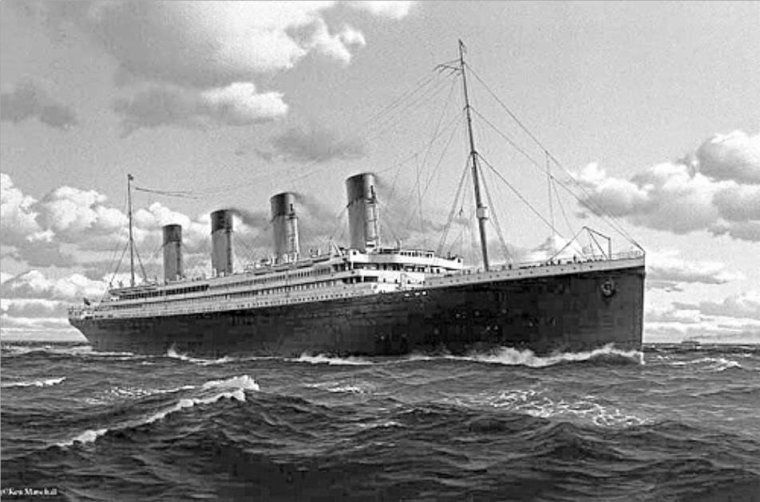

In [2]:
from IPython.core.display import Image, display
display(Image('http://animatedgifs.a.n.pic.centerblog.net/o/f0dd6638.jpg', width=400))

In [3]:
import pandas as pd

In [4]:
titanic_data = pd.read_csv("http://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv")

In [5]:
titanic_data.head( 3 )

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250


In [6]:
titanic_data.shape

(887, 8)

In [7]:
titanic_data.columns

Index([u'Survived', u'Pclass', u'Name', u'Sex', u'Age',
       u'Siblings/Spouses Aboard', u'Parents/Children Aboard', u'Fare'],
      dtype='object')

In [8]:
titanic_data.dtypes

Survived                     int64
Pclass                       int64
Name                        object
Sex                         object
Age                        float64
Siblings/Spouses Aboard      int64
Parents/Children Aboard      int64
Fare                       float64
dtype: object

In [9]:
titanic_data.values[0], titanic_data.values[1],

(array([0, 3, 'Mr. Owen Harris Braund', 'male', 22.0, 1, 0, 7.25],
       dtype=object),
 array([1, 1, 'Mrs. John Bradley (Florence Briggs Thayer) Cumings',
        'female', 38.0, 1, 0, 71.2833], dtype=object))

*Prétraitement *: 
On enlève les colonnes inutiles : Name

In [10]:
y=titanic_data['Survived']

In [11]:
x=titanic_data.drop('Survived', axis=1)

*Prétraitement *: 
On transforme les variables non numériques : Sex

In [12]:
x=x.drop('Name', axis=1)
x = pd.get_dummies(x, columns=['Sex'])
x.columns

Index([u'Pclass', u'Age', u'Siblings/Spouses Aboard',
       u'Parents/Children Aboard', u'Fare', u'Sex_female', u'Sex_male'],
      dtype='object')

Le codage pour les 2 premiers passagers devient :

In [13]:
print(x.values[0])
print(x.values[1])

[ 3.   22.    1.    0.    7.25  0.    1.  ]
[ 1.     38.      1.      0.     71.2833  1.      0.    ]


In [14]:
from sklearn.tree import DecisionTreeClassifier
 
clf = DecisionTreeClassifier().fit(x,y)

In [15]:
from sklearn.tree import export_graphviz
from IPython.core.display import Image, display
def printTree(clf):
    with open("tree.dot", 'w') as f:
        export_graphviz(clf, out_file=f,
                       feature_names=x.columns,
                        filled=True)
    !dot -Tpng tree.dot -o tree.png 
    display(Image('tree.png'))
    
printTree(clf)


/bin/sh: dot: command not found


## Questions Titanic

1. Trouver la valeur du paramètre  max_depth (entre 2 et 25) qui maximise la performance sur l'ensemble de test
clf = tree.DecisionTreeClassifier(max_depth=k)

0.8275185678918302


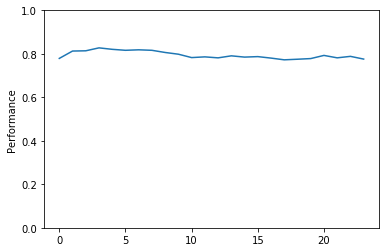

In [16]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

meanTabs = []
for i in range(2,26):   
    clf = tree.DecisionTreeClassifier(max_depth=i).fit(x,y)
    scores = cross_val_score(clf, x, y, cv=i)
    scores
    meanTabs.append(np.mean(scores))
print(np.max(meanTabs))
plt.ylim(0,1)
plt.plot(meanTabs)
plt.ylabel('Performance')
plt.show()


2. Dans un graphique, tracez la performance en fonction de la valeur de max_depth

0.8275185678918302


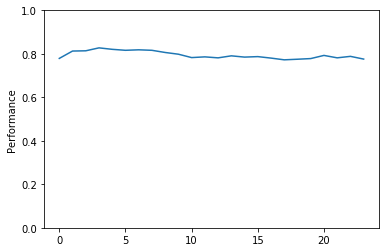

In [16]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

meanTabs = []
for i in range(2,26):   
    clf = tree.DecisionTreeClassifier(max_depth=i).fit(x,y)
    scores = cross_val_score(clf, x, y, cv=i)
    scores
    meanTabs.append(np.mean(scores))
print(np.max(meanTabs))
plt.ylim(0,1)
plt.plot(meanTabs)
plt.ylabel('Performance')
plt.show()


3. Afficher l'arbre correspondant 

In [21]:
from sklearn.tree import export_graphviz
from IPython.core.display import Image, display
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

def accuracy(y_pred,y) : 
    return (sum(y_pred == y))/len(y)

def printTree(clf):
    with open("tree.dot", 'w') as f:
        export_graphviz(clf, out_file=f,
                       feature_names=x.columns,
                        filled=True)
    !dot -Tpng tree.dot -o tree.png 
    display(Image('tree.png'))
clf = tree.DecisionTreeClassifier(max_depth=5).fit(x,y)
printTree(clf)

/bin/sh: dot: command not found


1. Retrouver la valeur optimale de max_depth en utilisant un gridsearch :
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [26]:
from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import make_scorer, accuracy_score


X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.4, random_state=0)

tree_para = {'criterion':['gini','entropy'],'max_depth':[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]}

acc_scorer = make_scorer(accuracy_score)

clf = GridSearchCV(DecisionTreeClassifier(), tree_para, cv=5)

clf.fit(X_train, y_train)
print(clf.score(x,y))


0.8331454340473506


## Questions OCR

1. Indiquez le prétraitement de vos données et la performance obtenue

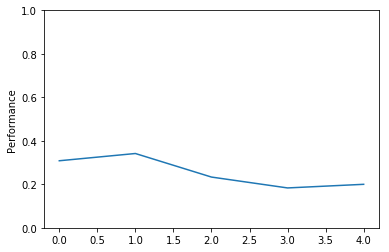

In [33]:
from PIL import Image, ImageFilter 
import numpy as np
from PIL.ImageFilter import (GaussianBlur, BLUR, CONTOUR, DETAIL, EDGE_ENHANCE, EDGE_ENHANCE_MORE,
    EMBOSS, FIND_EDGES, SMOOTH, SMOOTH_MORE, SHARPEN)
import collections
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display 
import os
from sklearn.model_selection import cross_val_score


valuesList = list()
labelsList = list()

def cropGrille(xinit, y, dx, dy, margex, margey, file, show=False):
    x=xinit
    im = Image.open(file)
    im = im.filter(GaussianBlur(radius=10))
    
    for j in range(10):
        x=xinit
        for i in range(10):
            #box = (x, y, x+dx, y+dy)    
            box = (x+margex, y+margey, x+dx-margex, y+dy-margey)
            region = im.crop(box)
                        
            region = region.convert('L')
            tab = np.array(region)
            tab = tab.reshape((region.size[0] * region.size[1]),)
            valuesList.append(tab)
            if( file == "p010.bmp"):
                labelsList.append((j+1)%10)
            else :
                labelsList.append(j)    
            x+=dx  
        y=y+dy 

cropGrille(150, 225, 94, 109, 10, 14, "20181026_183305_p004.bmp")
cropGrille(149, 225, 94, 109, 10, 14, "20181026_183305_p006.bmp")
cropGrille(152, 225, 94, 109, 10, 14, "20181026_183305_p007.bmp")
cropGrille(153, 225, 94, 109, 10, 14, "20181026_183305_p008.bmp")
cropGrille(152, 225, 94, 109, 10, 14, "20181026_183305_p009.bmp")
cropGrille(152, 225, 94, 109, 10, 14, "20181026_183305_p010.bmp")

valuesArray = np.array(valuesList)
labelsArray = np.array(labelsList)

X_train, X_test, y_train, y_test = train_test_split(
    valuesArray, labelsArray, test_size=0.4, random_state=0)

X_train.shape, y_train.shape

X_test.shape, y_test.shape

clf = tree.DecisionTreeClassifier().fit(X_train, y_train)
scores = cross_val_score(clf, valuesArray, labelsArray, cv=5)
scores

plt.ylim(0,1)
plt.plot(scores)
plt.ylabel('Performance')
plt.show()



2. Tracer la courbe d'apprentissage de votre classifieur OCR : 
- le nombre d'exemples pris en compte dans la base d'apprentissage (entre 100 et 600, tous les 50) en abscisse
- l'accuracy en ordonnée